In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:

columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23')

#### Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#### Starting from the most recent data point in the database. 

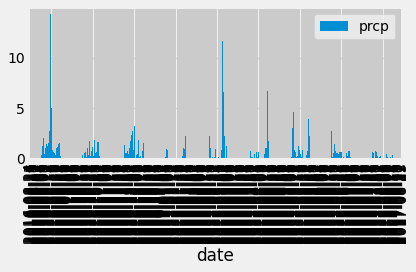

In [12]:
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the date and precipitation scores
sel = [Measurement.date, Measurement.prcp]
last_12 = session.query(*sel).filter(Measurement.date > '2016-08-23').all()
last_12
# Save the query results as a Pandas DataFrame and set the index to the date column
last12_df = pd.DataFrame(last_12, columns=["date", "prcp"])

grouped_12 = last12_df.groupby('date').sum()
# Sort the dataframe by date
grouped_12.sort_values('date')

# last12_df
# Use Pandas Plotting with Matplotlib to plot the data

grouped_12.plot.bar()
plt.tight_layout()
plt.show()



In [41]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_prcp = grouped_12["prcp"].agg(["mean", "median", "var", "std", "sem"])
summary_prcp

mean      0.974164
median    0.400000
var       3.155831
std       1.776466
sem       0.092984
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station).count()
station_count

9

In [47]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [Measurement.station, Measurement.date, Measurement.tobs, Station.name]
joined = session.query(*sel).filter(Measurement.station == Station.station).all()
joined_df = pd.DataFrame(joined, columns=['station', 'date', 'tobs', 'name'])
station_gp = joined_df.groupby('station').count()
station_gp.sort_values("tobs", ascending=False, inplace=True)
station_gp



,date,tobs,name
station,,,
USC00519281,2772,2772,2772
USC00519397,2724,2724,2724
USC00513117,2709,2709,2709
USC00519523,2669,2669,2669
USC00516128,2612,2612,2612
USC00514830,2202,2202,2202
USC00511918,1979,1979,1979
USC00517948,1372,1372,1372
USC00518838,511,511,511


The most active station is Waihee 837.5, HI US, station id USC00519281

In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest = session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281")
for temp in lowest:
    print(f"The lowest temperature recorded is: {temp}")
highest = session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281")
for temp in highest:
    print(f"The highest temperature recorded is: {temp}")
average = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281")
for temp in average:
    print(f"The average temperature recorded is: {temp}")
    

The lowest temperature recorded is: (54.0,)
The highest temperature recorded is: (85.0,)
The average temperature recorded is: (71.66378066378067,)


In [80]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date > '2016-08-23').all()
tobs = [int(result[0]) for result in results]


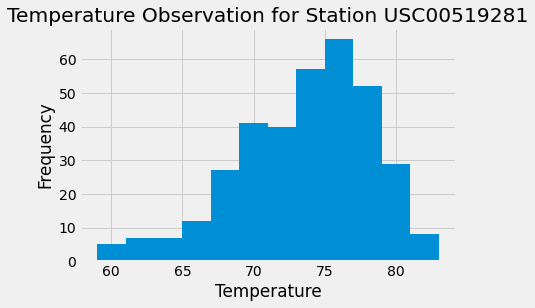

In [79]:
plt.hist(tobs, bins=12,)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Observation for Station USC00519281")
plt.show()

# Close session

In [81]:
# Close Session
session.close()